In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys 

# project_dir_path = '/home/onoue/ws/lukasiewicz_2'
project_dir_path = '/Users/keisukeonoue/ws/lukasiewicz_2'
sys.path.append(project_dir_path)

import cvxpy as cp 
import numpy as np 
import pandas as pd 

from src.setup_problem_dual_single_task import Setup

from src.objective_function_single_task import ObjectiveFunction
from src.predicate import Predicate_dual

In [3]:
data_dir_path = "./../inputs/toy_data"

file_names_dict = {
    'supervised': ['L_p1.csv', 'L_p2.csv', 'L_p3.csv'],

    'unsupervised': ['U.csv'],
    'rule': ['rules.txt']
}

# problem_instance = Setup(data_dir_path, file_names_dict, ObjectiveFunction, 'p3', c1=10, c2=10)

# objective, constraints = problem_instance.main()

# problem = cp.Problem(objective, constraints)
# result = problem.solve(verbose=True)

# 精度は悪くなさそう

 ~~切片 $b_j$ の値の調整ができていない気がする~~

load_data took 0.021158218383789062 seconds!
load_rules took 0.02109694480895996 seconds!
formulate_predicates_with_cvxpy took 9.918212890625e-05 seconds!
shape of P: (38, 38)
finish l
finish h
finish s
finish l h
finish l s
finish h s
_construct_P_j took 0.0006411075592041016 seconds!
construct_constraints took 0.0017271041870117188 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Feb 02 07:03:31 PM: Your problem has 96 variables, 29 constraints, and 0 parameters.
(CVXPY) Feb 02 07:03:31 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 02 07:03:31 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 02 07:03:31 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
----------------------------------------------------------

[I 2024-02-02 19:03:31,423] A new study created in memory with name: no-name-bd5ecfe7-773d-4ae1-8636-ae1aebb2e598
[I 2024-02-02 19:03:31,425] Trial 0 finished with value: 0.5 and parameters: {'b': 0.13867176326262243}. Best is trial 0 with value: 0.5.
[I 2024-02-02 19:03:31,426] Trial 1 finished with value: 0.5 and parameters: {'b': -0.4859637314301448}. Best is trial 0 with value: 0.5.
[I 2024-02-02 19:03:31,426] Trial 2 finished with value: 0.5 and parameters: {'b': -3.328083595947636}. Best is trial 0 with value: 0.5.
[I 2024-02-02 19:03:31,427] Trial 3 finished with value: 0.5 and parameters: {'b': -2.4916056754480835}. Best is trial 0 with value: 0.5.
[I 2024-02-02 19:03:31,427] Trial 4 finished with value: 0.5 and parameters: {'b': -2.0274854480623166}. Best is trial 0 with value: 0.5.
[I 2024-02-02 19:03:31,428] Trial 5 finished with value: 0.5 and parameters: {'b': -3.095720671764911}. Best is trial 0 with value: 0.5.
[I 2024-02-02 19:03:31,429] Trial 6 finished with value: 0.5


min_bound: -4.018920142208618
max_bound: 0.981079857791382



[I 2024-02-02 19:03:31,624] Trial 71 finished with value: 1.0 and parameters: {'b': -0.7460155035216682}. Best is trial 12 with value: 1.0.
[I 2024-02-02 19:03:31,626] Trial 72 finished with value: 0.5 and parameters: {'b': -0.5529039131052291}. Best is trial 12 with value: 1.0.
[I 2024-02-02 19:03:31,630] Trial 73 finished with value: 1.0 and parameters: {'b': -1.0308538123733715}. Best is trial 12 with value: 1.0.
[I 2024-02-02 19:03:31,634] Trial 74 finished with value: 1.0 and parameters: {'b': -0.8753312774667502}. Best is trial 12 with value: 1.0.
[I 2024-02-02 19:03:31,636] Trial 75 finished with value: 1.0 and parameters: {'b': -1.2712330338581723}. Best is trial 12 with value: 1.0.
[I 2024-02-02 19:03:31,639] Trial 76 finished with value: 0.5 and parameters: {'b': -0.23406847067189607}. Best is trial 12 with value: 1.0.
[I 2024-02-02 19:03:31,642] Trial 77 finished with value: 0.5 and parameters: {'b': 0.07550223611988138}. Best is trial 12 with value: 1.0.
[I 2024-02-02 19:03

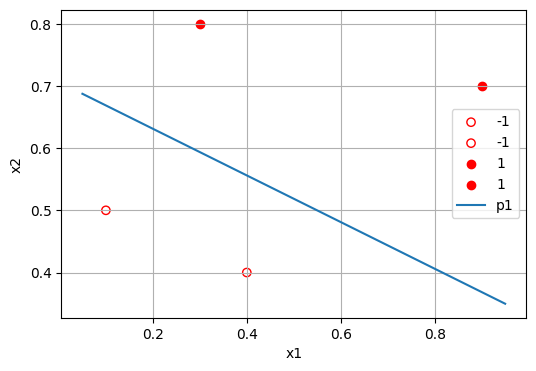


p1: [ 0.75014557  2.00018046 -0.91234604]


In [4]:
problem_instance = Setup(data_dir_path, file_names_dict, ObjectiveFunction, 'p1', c1=10, c2=10)

objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)


import matplotlib.pyplot as plt 


plt.figure(figsize=(6,4))

p1 = Predicate_dual(problem_instance, 'p1')
# p2 = Predicate_dual(problem_instance, 'p2')
# p3 = Predicate_dual(problem_instance, 'p3')



# ps = [p1, p2, p3]
ps = [p1]

test_x = np.linspace(0.05, 0.95, 100).reshape(-1, 1)
test_ys = []

for p in ps:
    w1 = p.coeff[0]
    w2 = p.coeff[1]
    b  = p.coeff[2]

    x = np.hstack([test_x, np.ones_like(test_x)])
    w = np.array([-w1/w2, -b/w2 + 0.5/w2]).reshape(-1,1)

    test_ys.append(x @ w)


colors = ['red', 'blue', 'green']


for p, c in zip(ps, colors):
    for l in range(4):
        if p.L[l, -1] == 1:
            plt.scatter(p.L[l, 0], p.L[l, 1], c=c, marker='o', label='1')
        else:
            plt.scatter(p.L[l, 0], p.L[l, 1], facecolors='none', edgecolors=c, marker='o', label='-1')
        
for j, test_y in enumerate(test_ys):
    plt.plot(test_x, test_y, label=f'p{j+1}')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

print()
print(f'p1: {p1.coeff}')

```
[ 0.75   2.    -1.075]
[ 0.31976744  1.93604651 -0.6127907 ]
[ 4.4890372e-11  2.0000000e+00 -4.0000000e-01]
```

load_data took 0.005072116851806641 seconds!
load_rules took 0.0005910396575927734 seconds!
formulate_predicates_with_cvxpy took 4.315376281738281e-05 seconds!
shape of P: (38, 38)
finish l
finish h
finish s
finish l h
finish l s
finish h s
_construct_P_j took 0.00026106834411621094 seconds!
construct_constraints took 0.0024890899658203125 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Feb 02 07:03:36 PM: Your problem has 96 variables, 29 constraints, and 0 parameters.


(CVXPY) Feb 02 07:03:36 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 02 07:03:36 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 02 07:03:36 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 02 07:03:36 PM: Compiling problem (target solver=OSQP).
(CVXPY) Feb 02 07:03:36 PM: Reduction chain: FlipObjective -> CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Feb 02 07:03:36 PM: Applying reduction FlipObjective
(CVXPY) Feb 02 07:03:36 PM: Applying reduction CvxAttr2Constr
(CVXPY) Feb 02 07:03:36 PM: Applying reduction Qp2SymbolicQp
(CVXPY) Feb 02 07:03:36 PM: Applying reduc

[I 2024-02-02 19:03:36,327] A new study created in memory with name: no-name-8cfbf234-ecd7-4ad8-82d2-17fb647c7b7d
[I 2024-02-02 19:03:36,328] Trial 0 finished with value: 1.0 and parameters: {'b': -0.8879649256598672}. Best is trial 0 with value: 1.0.
[I 2024-02-02 19:03:36,329] Trial 1 finished with value: 0.5 and parameters: {'b': 1.1834857366493612}. Best is trial 0 with value: 1.0.
[I 2024-02-02 19:03:36,330] Trial 2 finished with value: 1.0 and parameters: {'b': -0.8567790872142114}. Best is trial 0 with value: 1.0.
[I 2024-02-02 19:03:36,331] Trial 3 finished with value: 0.5 and parameters: {'b': -2.4960027342779476}. Best is trial 0 with value: 1.0.
[I 2024-02-02 19:03:36,333] Trial 4 finished with value: 0.5 and parameters: {'b': -3.059553042655362}. Best is trial 0 with value: 1.0.
[I 2024-02-02 19:03:36,334] Trial 5 finished with value: 1.0 and parameters: {'b': -0.673207769357405}. Best is trial 0 with value: 1.0.
[I 2024-02-02 19:03:36,334] Trial 6 finished with value: 0.5 


min_bound: -3.755496926897804
max_bound: 1.2445030731021962



[I 2024-02-02 19:03:36,486] Trial 49 finished with value: 0.75 and parameters: {'b': -0.2985749863743623}. Best is trial 0 with value: 1.0.
[I 2024-02-02 19:03:36,489] Trial 50 finished with value: 0.5 and parameters: {'b': -1.7639951500289883}. Best is trial 0 with value: 1.0.
[I 2024-02-02 19:03:36,491] Trial 51 finished with value: 1.0 and parameters: {'b': -0.9132300561460805}. Best is trial 0 with value: 1.0.
[I 2024-02-02 19:03:36,495] Trial 52 finished with value: 1.0 and parameters: {'b': -0.7323501119413093}. Best is trial 0 with value: 1.0.
[I 2024-02-02 19:03:36,499] Trial 53 finished with value: 0.5 and parameters: {'b': -1.2923491481488107}. Best is trial 0 with value: 1.0.
[I 2024-02-02 19:03:36,502] Trial 54 finished with value: 1.0 and parameters: {'b': -0.9612240652748494}. Best is trial 0 with value: 1.0.
[I 2024-02-02 19:03:36,505] Trial 55 finished with value: 0.75 and parameters: {'b': -0.6215273629101181}. Best is trial 0 with value: 1.0.
[I 2024-02-02 19:03:36,50

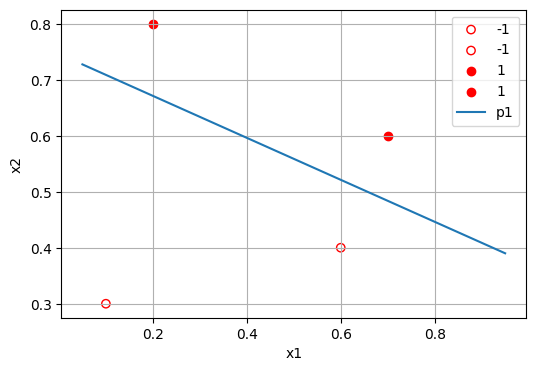


p2: [ 0.69721192  1.86021364 -0.88796493]


In [5]:
problem_instance = Setup(data_dir_path, file_names_dict, ObjectiveFunction, 'p2', c1=10, c2=10)

objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)


import matplotlib.pyplot as plt 


plt.figure(figsize=(6,4))

# p1 = Predicate_dual(problem_instance, 'p1')
p2 = Predicate_dual(problem_instance, 'p2')
# p3 = Predicate_dual(problem_instance, 'p3')



# ps = [p1, p2, p3]
ps = [p2]

test_x = np.linspace(0.05, 0.95, 100).reshape(-1, 1)
test_ys = []

for p in ps:
    w1 = p.coeff[0]
    w2 = p.coeff[1]
    b  = p.coeff[2]

    x = np.hstack([test_x, np.ones_like(test_x)])
    w = np.array([-w1/w2, -b/w2 + 0.5/w2]).reshape(-1,1)

    test_ys.append(x @ w)


colors = ['red', 'blue', 'green']


for p, c in zip(ps, colors):
    for l in range(4):
        if p.L[l, -1] == 1:
            plt.scatter(p.L[l, 0], p.L[l, 1], c=c, marker='o', label='1')
        else:
            plt.scatter(p.L[l, 0], p.L[l, 1], facecolors='none', edgecolors=c, marker='o', label='-1')
        
for j, test_y in enumerate(test_ys):
    plt.plot(test_x, test_y, label=f'p{j+1}')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

print()
print(f'p2: {p2.coeff}')

```
[ 0.75   2.    -1.075]
[ 0.31976744  1.93604651 -0.6127907 ]
[ 4.4890372e-11  2.0000000e+00 -4.0000000e-01]
```

load_data took 0.012391090393066406 seconds!
load_rules took 0.0018818378448486328 seconds!
formulate_predicates_with_cvxpy took 0.00023603439331054688 seconds!
shape of P: (38, 38)
finish l
finish h
finish s
finish l h
finish l s
finish h s
_construct_P_j took 0.0003230571746826172 seconds!
construct_constraints took 0.0020558834075927734 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Feb 02 07:03:40 PM: Your problem has 96 variables, 29 constraints, and 0 parameters.
(CVXPY) Feb 02 07:03:40 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 02 07:03:40 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 02 07:03:40 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
----------------------------------------------------

[I 2024-02-02 19:03:40,484] A new study created in memory with name: no-name-9872d5c1-3a96-4235-a12d-24f8c1a034c3
[I 2024-02-02 19:03:40,486] Trial 0 finished with value: 0.5 and parameters: {'b': -1.0039323882492317}. Best is trial 0 with value: 0.5.
[I 2024-02-02 19:03:40,486] Trial 1 finished with value: 0.5 and parameters: {'b': -2.456426179320977}. Best is trial 0 with value: 0.5.
[I 2024-02-02 19:03:40,487] Trial 2 finished with value: 0.5 and parameters: {'b': -2.477404758589633}. Best is trial 0 with value: 0.5.
[I 2024-02-02 19:03:40,487] Trial 3 finished with value: 0.5 and parameters: {'b': -1.4690798477122478}. Best is trial 0 with value: 0.5.
[I 2024-02-02 19:03:40,488] Trial 4 finished with value: 0.5 and parameters: {'b': 0.22453645671074796}. Best is trial 0 with value: 0.5.
[I 2024-02-02 19:03:40,489] Trial 5 finished with value: 0.75 and parameters: {'b': -0.7019703378136111}. Best is trial 5 with value: 0.75.
[I 2024-02-02 19:03:40,489] Trial 6 finished with value: 0


min_bound: -3.399947011833354
max_bound: 1.600052988166646



[I 2024-02-02 19:03:40,640] Trial 50 finished with value: 0.5 and parameters: {'b': 0.5432342949870034}. Best is trial 11 with value: 1.0.
[I 2024-02-02 19:03:40,642] Trial 51 finished with value: 1.0 and parameters: {'b': -0.37625383323544376}. Best is trial 11 with value: 1.0.
[I 2024-02-02 19:03:40,645] Trial 52 finished with value: 1.0 and parameters: {'b': -0.4033797283982}. Best is trial 11 with value: 1.0.
[I 2024-02-02 19:03:40,649] Trial 53 finished with value: 0.75 and parameters: {'b': -0.8715661698543056}. Best is trial 11 with value: 1.0.
[I 2024-02-02 19:03:40,652] Trial 54 finished with value: 0.75 and parameters: {'b': 0.08076939187195192}. Best is trial 11 with value: 1.0.
[I 2024-02-02 19:03:40,656] Trial 55 finished with value: 1.0 and parameters: {'b': -0.46144301135421645}. Best is trial 11 with value: 1.0.
[I 2024-02-02 19:03:40,658] Trial 56 finished with value: 0.75 and parameters: {'b': -0.7442907075733183}. Best is trial 11 with value: 1.0.
[I 2024-02-02 19:03

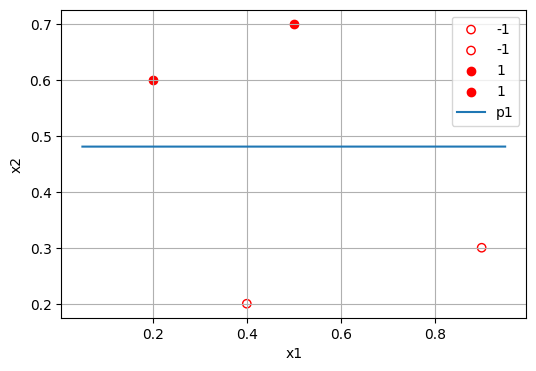


p3: [-1.15856076e-04  2.00001098e+00 -4.61112216e-01]


In [6]:
problem_instance = Setup(data_dir_path, file_names_dict, ObjectiveFunction, 'p3', c1=10, c2=10)

objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)


import matplotlib.pyplot as plt 


plt.figure(figsize=(6,4))

# p1 = Predicate_dual(problem_instance, 'p1')
# p2 = Predicate_dual(problem_instance, 'p2')
p3 = Predicate_dual(problem_instance, 'p3')



# ps = [p1, p2, p3]
ps = [p3]

test_x = np.linspace(0.05, 0.95, 100).reshape(-1, 1)
test_ys = []

for p in ps:
    w1 = p.coeff[0]
    w2 = p.coeff[1]
    b  = p.coeff[2]

    x = np.hstack([test_x, np.ones_like(test_x)])
    w = np.array([-w1/w2, -b/w2 + 0.5/w2]).reshape(-1,1)

    test_ys.append(x @ w)


colors = ['red', 'blue', 'green']


for p, c in zip(ps, colors):
    for l in range(4):
        if p.L[l, -1] == 1:
            plt.scatter(p.L[l, 0], p.L[l, 1], c=c, marker='o', label='1')
        else:
            plt.scatter(p.L[l, 0], p.L[l, 1], facecolors='none', edgecolors=c, marker='o', label='-1')
        
for j, test_y in enumerate(test_ys):
    plt.plot(test_x, test_y, label=f'p{j+1}')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

print()
print(f'p3: {p3.coeff}')

```
[ 0.75   2.    -1.075]
[ 0.31976744  1.93604651 -0.6127907 ]
[ 4.4890372e-11  2.0000000e+00 -4.0000000e-01]
```

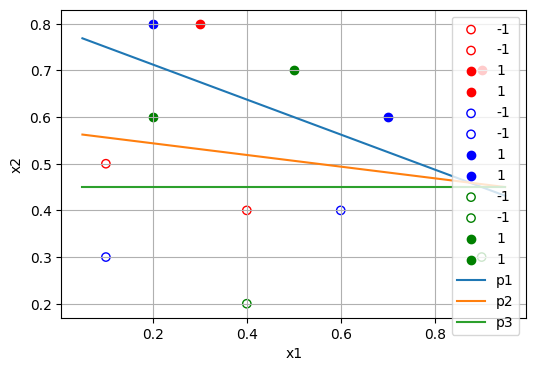

# pima indian 計算コスト

## 150

In [8]:
data_dir_path = os.path.join(project_dir_path, 'inputs/pima_indian_diabetes_cv/fold_0')
train_data_dir_path = os.path.join(data_dir_path, "train")
file_list = os.listdir(train_data_dir_path)

L_files = [filename for filename in file_list 
           if filename.startswith('L') and filename.endswith('.csv')]

U_files = [filename for filename in file_list 
           if filename.startswith('U') and filename.endswith('.csv')]

file_names_dict = {
    'supervised': L_files,
    'unsupervised': U_files,
    'rule': ['rule.txt']
}

train_data_dir_path = os.path.join(data_dir_path, "train")

problem_instance = Setup(train_data_dir_path, file_names_dict, ObjectiveFunction, 'Outcome', c1=10, c2=10)
objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

load_data took 0.06258797645568848 seconds!
load_rules took 0.06591606140136719 seconds!
formulate_predicates_with_cvxpy took 0.00023412704467773438 seconds!
shape of P: (8422, 8422)
finish l
finish h
finish s
finish l h
finish l s
finish h s
_construct_P_j took 2.6564972400665283 seconds!
construct_constraints took 1.647413969039917 seconds!


/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:157: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "
/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:163: UserWarning: Constraint #0 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Jan 28 09:35:42 AM: Your problem has 49176 variables, 7737 constraints, and 0 parameters.
(CVXPY) Jan 28 09:35:57 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 28 09:35:57 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 28 09:35:57 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 28 09:35:58 AM: Compiling problem (target solver=OSQP).
(CVXPY) Jan 28 09:35:58 AM: Reduction chain: FlipObjective -> CvxAttr2Constr -> Qp2Symboli

/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:163: UserWarning: Constraint #4 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


(CVXPY) Jan 28 09:36:00 AM: Applying reduction QpMatrixStuffing


/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:163: UserWarning: Constraint #5 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


(CVXPY) Jan 28 09:38:26 AM: Applying reduction OSQP
(CVXPY) Jan 28 09:38:29 AM: Finished problem compilation (took 1.521e+02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jan 28 09:38:29 AM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 57598, constraints m = 65335
          nnz(P) + nnz(A) = 11645523
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.

## 100 

- 計算が回った (18分)
- 目的関数の行列 P の計算に時間がかかっている。
- 多重 loop による各要素を計算しているので、それを numpy の多次元配列の掛け算等で計算できれば早くなるのではないか

In [7]:
data_dir_path = os.path.join(project_dir_path, 'inputs/pima_indian_diabetes_cv_2/fold_0')
train_data_dir_path = os.path.join(data_dir_path, "train")
file_list = os.listdir(train_data_dir_path)

L_files = [filename for filename in file_list 
           if filename.startswith('L') and filename.endswith('.csv')]

U_files = [filename for filename in file_list 
           if filename.startswith('U') and filename.endswith('.csv')]

file_names_dict = {
    'supervised': L_files,
    'unsupervised': U_files,
    'rule': ['rule.txt']
}

train_data_dir_path = os.path.join(data_dir_path, "train")

problem_instance = Setup(train_data_dir_path, file_names_dict, ObjectiveFunction, 'Outcome', c1=10, c2=10)
objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

load_data took 0.044497013092041016 seconds!
load_rules took 0.06009316444396973 seconds!
formulate_predicates_with_cvxpy took 0.00011205673217773438 seconds!
shape of P: (5972, 5972)
finish l
(100, 100)
finish h
finish s
finish l h
finish l s
finish h s
_construct_P_j took 954.5740349292755 seconds!
construct_constraints took 0.8618621826171875 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Jan 26 03:52:18 PM: Your problem has 44576 variables, 5337 constraints, and 0 parameters.


/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:157: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "
/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:163: UserWarning: Constraint #0 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


(CVXPY) Jan 26 03:52:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 26 03:52:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 26 03:52:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 26 03:52:30 PM: Compiling problem (target solver=OSQP).
(CVXPY) Jan 26 03:52:30 PM: Reduction chain: FlipObjective -> CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Jan 26 03:52:30 PM: Applying reduction FlipObjective
(CVXPY) Jan 26 03:52:30 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 26 03:52:31 PM: Applying reduction Qp2SymbolicQp


/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:163: UserWarning: Constraint #4 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


(CVXPY) Jan 26 03:52:32 PM: Applying reduction QpMatrixStuffing


/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:163: UserWarning: Constraint #5 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


(CVXPY) Jan 26 03:53:27 PM: Applying reduction OSQP
(CVXPY) Jan 26 03:53:29 PM: Finished problem compilation (took 5.941e+01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jan 26 03:53:29 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 50548, constraints m = 55885
          nnz(P) + nnz(A) = 6414073
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.0

## 高速化 テスト

- 現時点で 18分 ー＞ 7分40秒 になった (100)
- あとは P_{23} をなんとかすれば
- P_{12} も改善の余地はある
- 150 だと 19分かかったが動作した


- P_{23} と P_{12} で数分単位で時間がかかっている

- 基本的に行列の積で書くと速くなる
- einsum は速くなる場合と特に変わらない場合があり、基準がわからない

### to do

- 残りの実装 (可能であれば Predicate, constraint も見直す)
- 計算時間ベンチマーク 可視化
- 数式をまとめる

In [7]:
data_dir_path = os.path.join(project_dir_path, 'inputs/pima_indian_diabetes_cv_2/fold_0')
train_data_dir_path = os.path.join(data_dir_path, "train")
file_list = os.listdir(train_data_dir_path)

L_files = [filename for filename in file_list 
           if filename.startswith('L') and filename.endswith('.csv')]

U_files = [filename for filename in file_list 
           if filename.startswith('U') and filename.endswith('.csv')]

file_names_dict = {
    'supervised': L_files,
    'unsupervised': U_files,
    'rule': ['rule.txt']
}

train_data_dir_path = os.path.join(data_dir_path, "train")

problem_instance = Setup(train_data_dir_path, file_names_dict, ObjectiveFunction, 'Outcome', c1=10, c2=10)
objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

load_data took 0.039694786071777344 seconds!
load_rules took 0.04925870895385742 seconds!
formulate_predicates_with_cvxpy took 0.0006020069122314453 seconds!
shape of P: (5972, 5972)
finish l
shape of M_vstacked: (4800, 100)
finish h
finish s
shape of K: (536, 100)
finish l h
finish l s
finish h s
_construct_P_j took 319.89110708236694 seconds!
construct_constraints took 0.8036189079284668 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Jan 27 09:23:56 PM: Your problem has 44576 variables, 5337 constraints, and 0 parameters.


/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:157: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "
/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:163: UserWarning: Constraint #0 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


(CVXPY) Jan 27 09:24:06 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 27 09:24:06 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 27 09:24:06 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 27 09:24:06 PM: Compiling problem (target solver=OSQP).
(CVXPY) Jan 27 09:24:06 PM: Reduction chain: FlipObjective -> CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Jan 27 09:24:06 PM: Applying reduction FlipObjective
(CVXPY) Jan 27 09:24:06 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 27 09:24:07 PM: Applying reduction Qp2SymbolicQp


/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:163: UserWarning: Constraint #4 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


(CVXPY) Jan 27 09:24:08 PM: Applying reduction QpMatrixStuffing


/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:163: UserWarning: Constraint #5 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


(CVXPY) Jan 27 09:25:05 PM: Applying reduction OSQP
(CVXPY) Jan 27 09:25:07 PM: Finished problem compilation (took 6.116e+01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jan 27 09:25:07 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 50548, constraints m = 55885
          nnz(P) + nnz(A) = 6414073
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.0

In [7]:
data_dir_path = os.path.join(project_dir_path, 'inputs/pima_indian_diabetes_cv_2/fold_0')
train_data_dir_path = os.path.join(data_dir_path, "train")
file_list = os.listdir(train_data_dir_path)

L_files = [filename for filename in file_list 
           if filename.startswith('L') and filename.endswith('.csv')]

U_files = [filename for filename in file_list 
           if filename.startswith('U') and filename.endswith('.csv')]

file_names_dict = {
    'supervised': L_files,
    'unsupervised': U_files,
    'rule': ['rule.txt']
}

train_data_dir_path = os.path.join(data_dir_path, "train")

problem_instance = Setup(train_data_dir_path, file_names_dict, ObjectiveFunction, 'Outcome', c1=10, c2=10)
objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

load_data took 0.04285311698913574 seconds!
load_rules took 0.04620695114135742 seconds!
formulate_predicates_with_cvxpy took 0.00018405914306640625 seconds!
shape of P: (5972, 5972)
finish l
finish h
finish s
finish l h
finish l s
finish h s
_construct_P_j took 2.002638101577759 seconds!
construct_constraints took 0.857062816619873 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Jan 28 09:31:06 AM: Your problem has 44576 variables, 5337 constraints, and 0 parameters.


/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:157: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "
/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:163: UserWarning: Constraint #0 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


(CVXPY) Jan 28 09:31:16 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 28 09:31:16 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 28 09:31:16 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 28 09:31:16 AM: Compiling problem (target solver=OSQP).
(CVXPY) Jan 28 09:31:16 AM: Reduction chain: FlipObjective -> CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Jan 28 09:31:16 AM: Applying reduction FlipObjective
(CVXPY) Jan 28 09:31:16 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 28 09:31:17 AM: Applying reduction Qp2SymbolicQp


/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:163: UserWarning: Constraint #4 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


(CVXPY) Jan 28 09:31:18 AM: Applying reduction QpMatrixStuffing


/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/cvxpy/problems/problem.py:163: UserWarning: Constraint #5 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


(CVXPY) Jan 28 09:32:15 AM: Applying reduction OSQP
(CVXPY) Jan 28 09:32:17 AM: Finished problem compilation (took 6.131e+01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jan 28 09:32:17 AM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 50548, constraints m = 55885
          nnz(P) + nnz(A) = 6414073
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.0